In [259]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [229]:
data=load_iris()

In [230]:
data1=pd.DataFrame(data.data,columns=data.feature_names)
data1['target_species']=data.target

<IPython.core.display.Javascript object>

Data Exploration

In [231]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [232]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [233]:
data1.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [234]:
data1.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [235]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_species     150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [236]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [237]:
data1.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target_species       0
dtype: int64

In [238]:
data1.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target_species,0.782561,-0.426658,0.949035,0.956547,1.000000


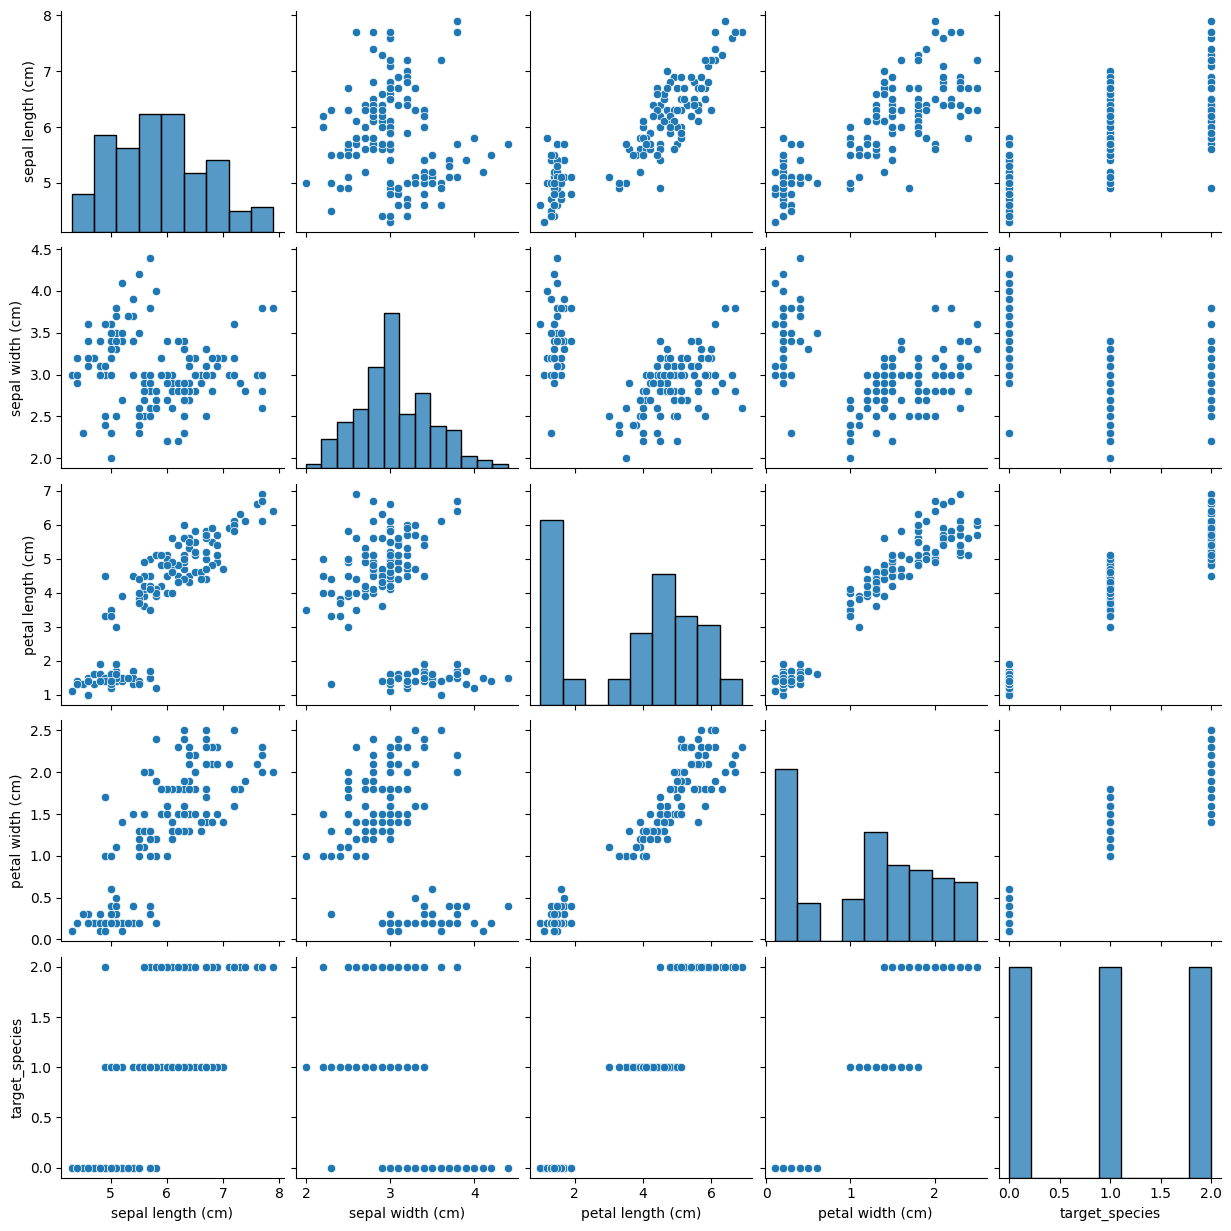

In [239]:
sns.pairplot(data1)

<Axes: >

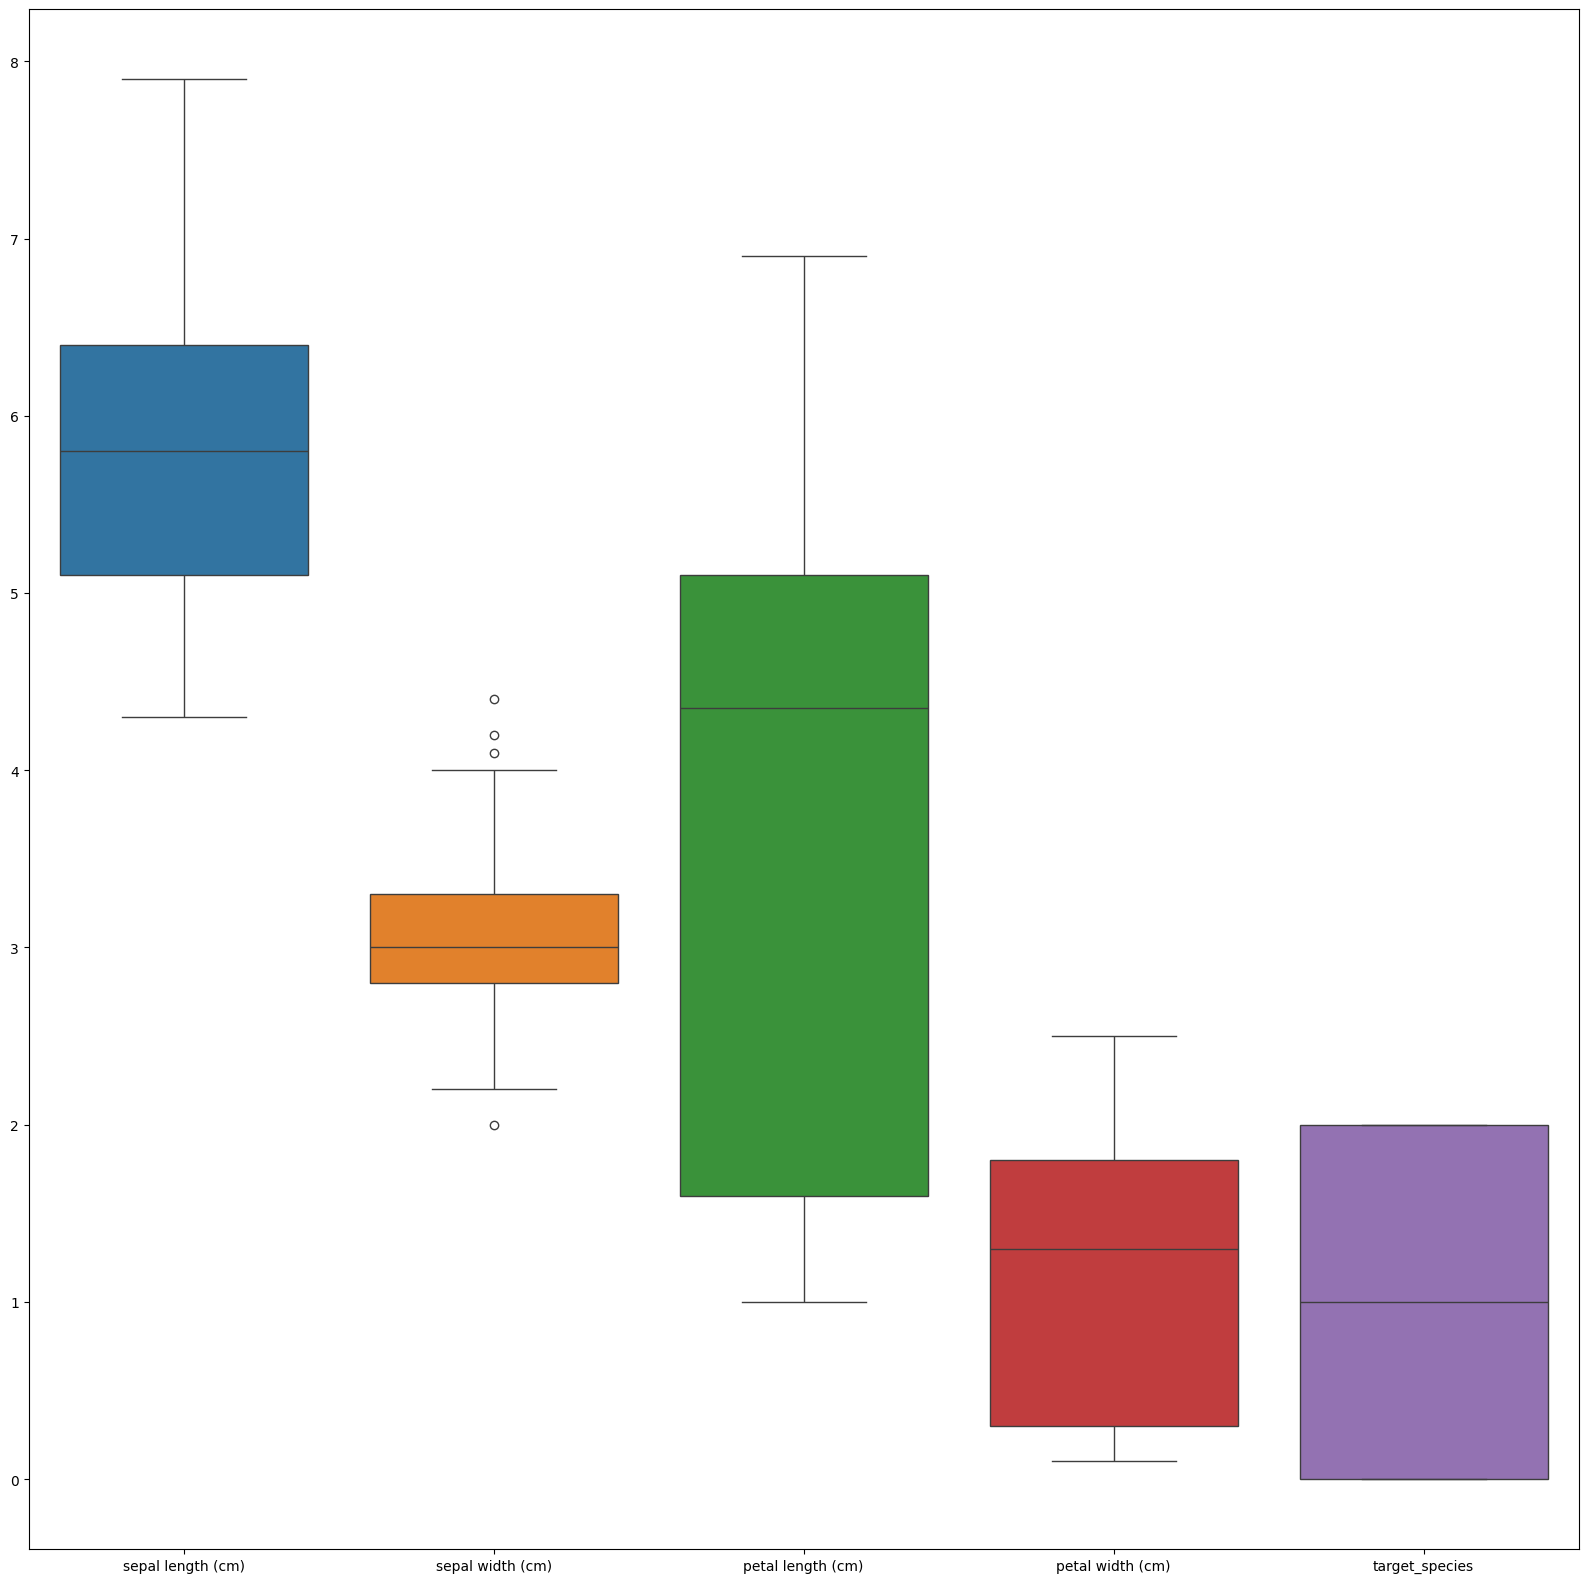

In [240]:
plt.figure(figsize=(20,20))
sns.boxplot(data1)

In [241]:
data_columns=data1.columns

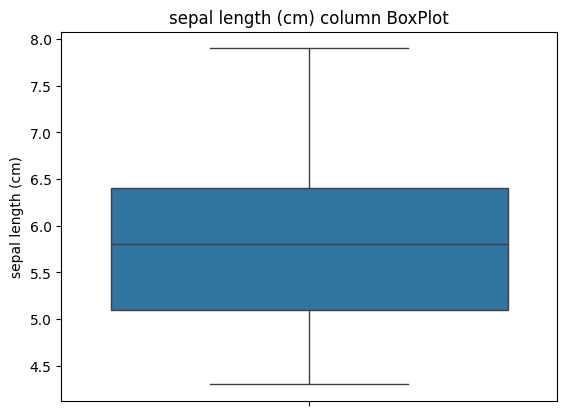

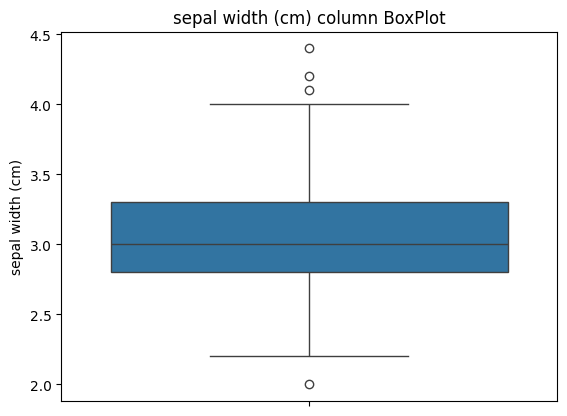

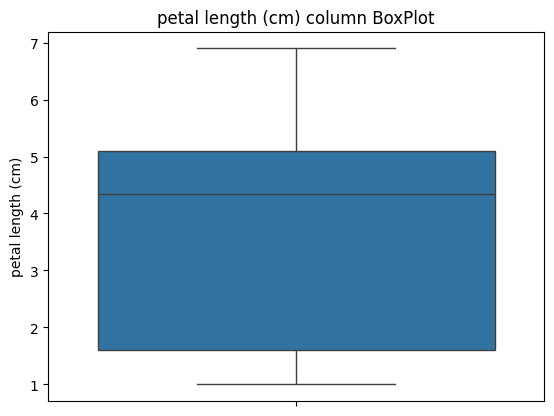

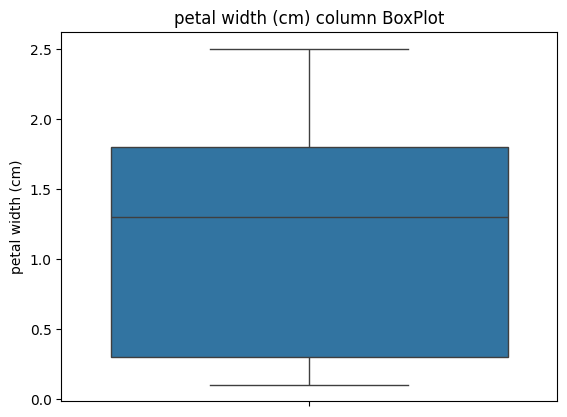

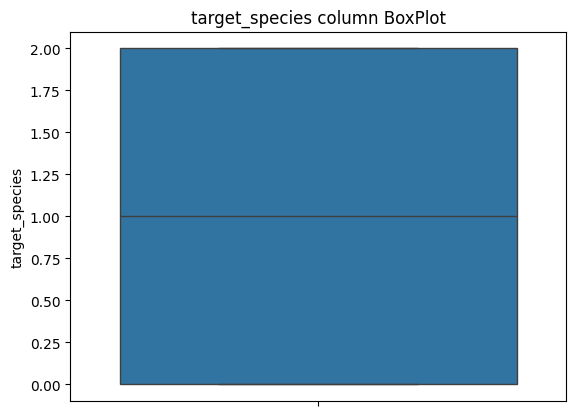

In [242]:
for i in data_columns:
    plt.title(f'{i} column BoxPlot')
    sns.boxplot(data1[i])
    plt.show()

<Axes: xlabel='target_species', ylabel='sepal width (cm)'>

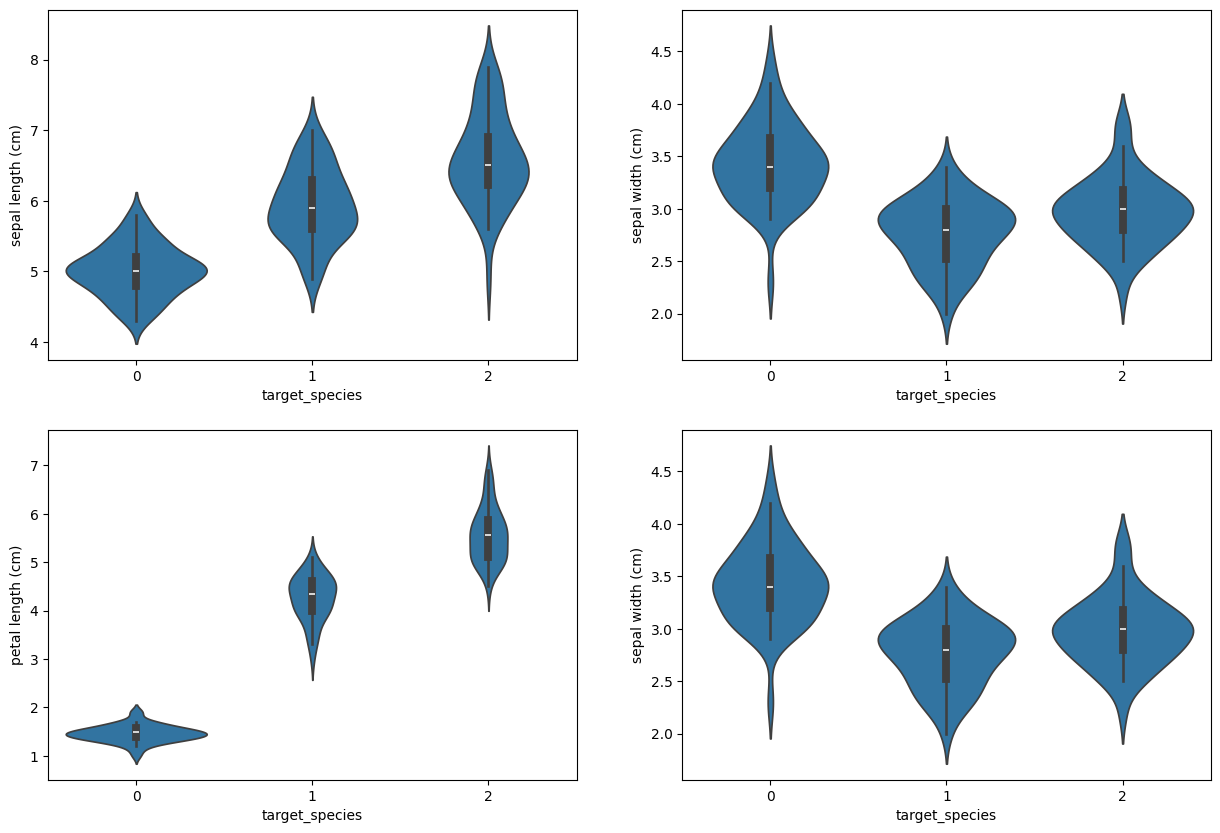

In [243]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target_species',y='sepal length (cm)',data=data1)
plt.subplot(2,2,2)
sns.violinplot(x='target_species',y='sepal width (cm)',data=data1)
plt.subplot(2,2,3)
sns.violinplot(x='target_species',y='petal length (cm)',data=data1)
plt.subplot(2,2,4)
sns.violinplot(x='target_species',y='sepal width (cm)',data=data1)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

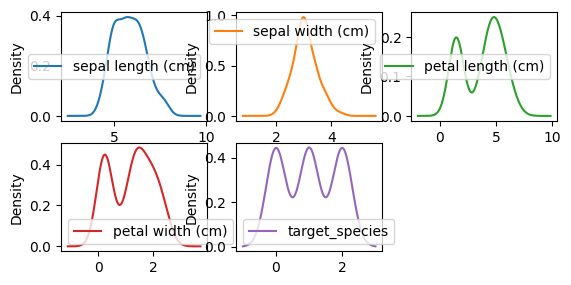

In [244]:
data1.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

petal length (cm)
1.0    Axes(0.125,0.11;0.775x0.77)
1.1    Axes(0.125,0.11;0.775x0.77)
1.2    Axes(0.125,0.11;0.775x0.77)
1.3    Axes(0.125,0.11;0.775x0.77)
1.4    Axes(0.125,0.11;0.775x0.77)
1.5    Axes(0.125,0.11;0.775x0.77)
1.6    Axes(0.125,0.11;0.775x0.77)
1.7    Axes(0.125,0.11;0.775x0.77)
1.9    Axes(0.125,0.11;0.775x0.77)
3.0    Axes(0.125,0.11;0.775x0.77)
3.3    Axes(0.125,0.11;0.775x0.77)
3.5    Axes(0.125,0.11;0.775x0.77)
3.6    Axes(0.125,0.11;0.775x0.77)
3.7    Axes(0.125,0.11;0.775x0.77)
3.8    Axes(0.125,0.11;0.775x0.77)
3.9    Axes(0.125,0.11;0.775x0.77)
4.0    Axes(0.125,0.11;0.775x0.77)
4.1    Axes(0.125,0.11;0.775x0.77)
4.2    Axes(0.125,0.11;0.775x0.77)
4.3    Axes(0.125,0.11;0.775x0.77)
4.4    Axes(0.125,0.11;0.775x0.77)
4.5    Axes(0.125,0.11;0.775x0.77)
4.6    Axes(0.125,0.11;0.775x0.77)
4.7    Axes(0.125,0.11;0.775x0.77)
4.8    Axes(0.125,0.11;0.775x0.77)
4.9    Axes(0.125,0.11;0.775x0.77)
5.0    Axes(0.125,0.11;0.775x0.77)
5.1    Axes(0.125,0.11;0.775x0.77)
5.

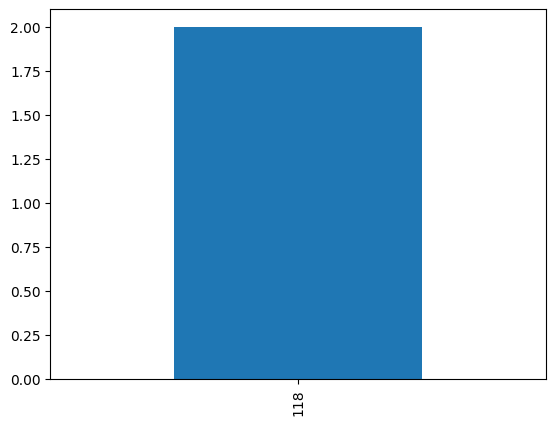

In [245]:
data1.target_species.groupby(data1['petal length (cm)']).plot(kind='bar')

<Axes: >

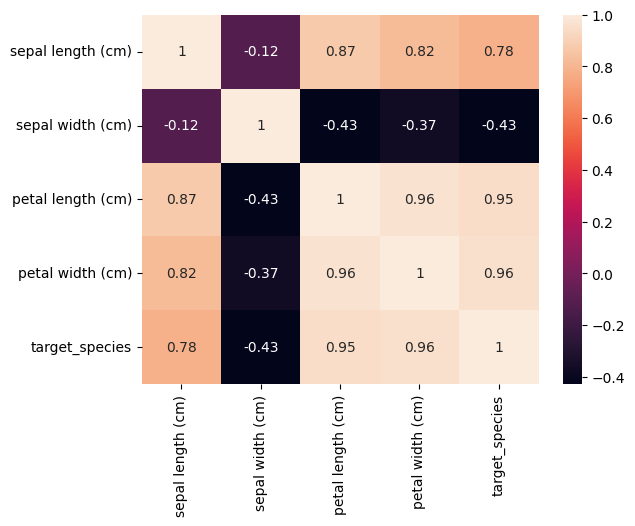

In [246]:
sns.heatmap(data1.corr(),annot=True)

Data Spliting

In [247]:
x=data.data
y=data.target

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Model Training

In [249]:
models={'LogisticRegression':LogisticRegression(),
        'LogisticRegressionCV':LogisticRegressionCV(),
        'SVC':SVC(),
        'GaussianNB':GaussianNB(),
        'AdaBoostClassifier':AdaBoostClassifier(),
        'ExtraTreesClassifier':ExtraTreesClassifier(),
        'ExtraTreeClassifier':ExtraTreeClassifier(),
        'RandomForestClassifier':RandomForestClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'KNeighborsClassifier':KNeighborsClassifier()
       }

In [250]:
report={}
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    report[list(models.keys())[i]]=acc_score

In [251]:
report

{'LogisticRegression': 0.9777777777777777,
 'LogisticRegressionCV': 0.9777777777777777,
 'SVC': 0.9777777777777777,
 'GaussianNB': 0.9777777777777777,
 'AdaBoostClassifier': 0.9333333333333333,
 'ExtraTreesClassifier': 0.9777777777777777,
 'ExtraTreeClassifier': 0.9333333333333333,
 'RandomForestClassifier': 0.9777777777777777,
 'DecisionTreeClassifier': 0.9777777777777777,
 'KNeighborsClassifier': 1.0}

In [252]:
hhg_acc=max(list(report.values()))
index_val=list(report.values()).index(hhg_acc)
high_accuracy_model=list(models.values())[index_val]

In [253]:
high_accuracy_model

KNeighborsClassifier()

In [254]:
high_accuracy_model.fit(x_train,y_train)

KNeighborsClassifier()

In [255]:
y_pred=high_accuracy_model.predict(x_test)

In [256]:
accuracy_score(y_test,y_pred)

1.0

In [257]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

<Axes: >

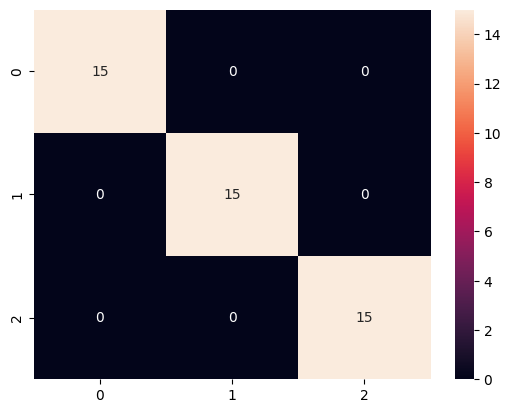

In [258]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)